## Credit Decision Model

## Import libraries

In [357]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/home/developer/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [358]:
submission = pd.read_csv('/home/developer/Desktop/dataset/sample_submissio.csv')

In [359]:
train_path = '/home/developer/Desktop/dataset/train-1.csv'
test_path = '/home/developer/Desktop/dataset/test-1.csv'

In [360]:
df_train_ = pd.read_csv(train_path, sep=',') 
df_test_ = pd.read_csv(test_path, sep=',')

In [361]:
df_train_.head()

,customer_id,disbursed_loan_amount,property_value,ltv,current_pincode,date_of_birth,employment_type,disbursal_date,employee_id,mobile_flag,...,sec_total_sanctioned_amt,sec_total_disbursed_amt,monthly_installment,sec_monthly_installment,new_accts_last_six_mths,delinquent_accts_last_six_mths,average_loan_tenure,credit_history_length,credit_inquiries,loan_default
0,420825,50578,58400,89.55,1441,01-01-84,Salaried,03-08-18,1998,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,1502,31-07-85,Self employed,26-09-18,1998,1,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,1497,24-08-85,Self employed,01-08-18,1998,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,1501,30-12-93,Self employed,26-10-18,1998,1,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,1495,09-12-77,Self employed,26-09-18,1998,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [362]:
df_test_.head()

,customer_id,disbursed_loan_amount,property_value,ltv,current_pincode,date_of_birth,employment_type,disbursal_date,employee_id,mobile_flag,...,sec_total_sanctioned_amt,sec_total_disbursed_amt,monthly_installment,sec_monthly_installment,new_accts_last_six_mths,delinquent_accts_last_six_mths,average_loan_tenure,credit_history_length,credit_inquiries,loan_default
0,655269,53478,63558,86.54,1497,01-01-74,Salaried,03-11-18,1998,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN
1,723482,55513,63163,89.45,1497,20-05-85,Self employed,20-11-18,1998,1,...,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1,NaN
2,758529,65282,84320,79.93,2071,14-10-95,Salaried,29-11-18,1646,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN
3,763449,46905,63896,76.58,2070,01-06-73,Self employed,29-11-18,1646,1,...,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0,NaN
4,708663,51428,63896,86.08,2069,01-06-72,Salaried,17-11-18,1646,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN


* customer_id - unique ID
* loan_default - Payment default in the first EMI on due date
* disbursed_loan_amount - Amount of Loan disbursed
* property_value - Cost of the Property
* ltv - Loan to Value of the Property
* average_loan_tenure - Average loan tenure
* credit_history_length - Time since first loan
* credit_inquiries - Enquries done by the customer for loans
* PAN_flag - if pan was shared by the customer then flagged as 1
* credit_score - Bureau Score
* credit_score_desc - Bureau score description
* active_no_accts - count of active loans taken by the customer at the time of disbursement 
* active_curr_balance - total Principal outstanding amount of the active loans at the time of disbursement 
* total_disbursed_amt - total amount that was disbursed for all the loans at the time of disbursement 
* total_no_accts - count of total loans taken by the customer at the time of disbursement
* total_default_accts - count of default accounts at the time of disbursement 
* total_sanctioned_amt - total amount that was sanctioned for all the loans at the time of disbursement
* monthly_installment - EMI Amount of the primary loan 
* passport_flag - if passport was shared by the customer then flagged as 1 
* sec_active_no_accts - count of active loans taken by the customer at the time of disbursement 
* sec_active_curr_balance - total Principal outstanding amount of the active loans at the time of disbursement 
* sec_total_disbursed_amt - total amount that was disbursed for all the loans at the time of disbursement
* sec_monthly_installment - EMI Amount of the secondary loan 
* sec_total_no_accts - count of total loans taken by the customer at the time of disbursement
* sec_total_default_accts - count of default accounts at the time of disbursement
* sec_total_sanctioned_amt - total amount that was sanctioned for all the loans at the time of disbursement
* mobile_flag - if Mobile no. was shared by the customer then flagged as 1
* current_pincode - Current pincode of the customer
* delinquent_acct_last_six_mths  - Loans defaulted in the last 6 months
* date_of_birth - date of birth
* employee_id - Employee who logged the disbursement
* employment_type - Employment Type of the customer (Salaried/Self Employed)
* new_accts_last_six_mths - New loans taken by the customer in last 6 months before the disbursement
* credit_inquiries - Enquries done by the customer for loans
* PAN_flag - if pan was shared by the customer then flagged as 1
* DisbursalDate - Date of loan disbursement

Negative values : active_curr_balance, total_sanctioned_amt, sec_active_curr_balance 

Imagine a borrower who is not able to pay any emi on the loan. Interests will keep piling up in that case which ultimately will lead to negative outstanding balance.

In [363]:
df = pd.concat([df_test_, df_train_], sort=False, join="outer")

In [364]:
df.head()

,customer_id,disbursed_loan_amount,property_value,ltv,current_pincode,date_of_birth,employment_type,disbursal_date,employee_id,mobile_flag,...,sec_total_sanctioned_amt,sec_total_disbursed_amt,monthly_installment,sec_monthly_installment,new_accts_last_six_mths,delinquent_accts_last_six_mths,average_loan_tenure,credit_history_length,credit_inquiries,loan_default
0,655269,53478,63558,86.54,1497,01-01-74,Salaried,03-11-18,1998,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN
1,723482,55513,63163,89.45,1497,20-05-85,Self employed,20-11-18,1998,1,...,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1,NaN
2,758529,65282,84320,79.93,2071,14-10-95,Salaried,29-11-18,1646,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN
3,763449,46905,63896,76.58,2070,01-06-73,Self employed,29-11-18,1646,1,...,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0,NaN
4,708663,51428,63896,86.08,2069,01-06-72,Salaried,17-11-18,1646,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN


In [365]:
df.shape[0] == df_train_.shape[0] + df_test_.shape[0]

True

In [366]:
df.columns

Index([u'customer_id', u'disbursed_loan_amount', u'property_value', u'ltv',
       u'current_pincode', u'date_of_birth', u'employment_type',
       u'disbursal_date', u'employee_id', u'mobile_flag', u'aadhar_flag',
       u'PAN_flag', u'passport_flag', u'credit_score', u'credit_score_desc',
       u'total_no_accts', u'active_no_accts', u'total_default_accts',
       u'active_curr_balance', u'total_sanctioned_amt', u'total_disbursed_amt',
       u'sec_total_no_accts', u'sec_active_no_accts',
       u'sec_total_default_accts', u'sec_active_curr_balance',
       u'sec_total_sanctioned_amt', u'sec_total_disbursed_amt',
       u'monthly_installment', u'sec_monthly_installment',
       u'new_accts_last_six_mths', u'delinquent_accts_last_six_mths',
       u'average_loan_tenure', u'credit_history_length', u'credit_inquiries',
       u'loan_default'],
      dtype='object')

In [367]:
df['delinquent_accts_last_six_mths'].head()

0    0
1    0
2    0
3    0
4    0
Name: delinquent_accts_last_six_mths, dtype: int64

##Drop list
1. credit_history_length
2. average_loan_tenure
3. date_of_birth
4. disbursal_date
5. mobile_flag
6. credit_score_desc
7. credit_score
8. disbursed_loan_amt 

In [368]:
import re

def transform_rows(x):
  arr = re.findall(r'\d+', x)
  return 12*int(arr[0]) + int(arr[1])

In [369]:
df['average_acct_age_month'] = df['average_loan_tenure'].apply(lambda x: transform_rows(x))
df['credit_history_length_month'] = df['credit_history_length'].apply(lambda x: transform_rows(x))

In [370]:
from datetime import datetime, date


def calculate_age(x):
  born = datetime.strptime(x, '%d-%m-%y')
  born_year = born.year
  if born_year > 2001:
    born_year -= 100
  today = date.today()
  return today.year - born_year - ((today.month, today.day) < (born.month, born.day))

In [371]:
df['age'] = df['date_of_birth'].apply(lambda x: calculate_age(x))

In [372]:
df['DisbursalDate'] = df['disbursal_date'].apply(lambda x: datetime.strptime(x, '%d-%m-%y'))

In [373]:
df['DisbursalDate_year'] = df['DisbursalDate'].apply(lambda x: x.year)
df['DisbursalDate_month'] = df['DisbursalDate'].apply(lambda x: x.month)
df['DisbursalDate_month_day'] = df['DisbursalDate'].apply(lambda x: x.day)
df['DisbursalDate_month_day_of_week'] = df['DisbursalDate'].apply(lambda x: x.weekday())

In [374]:
import holidays

india_holidays = holidays.India()
df['DisbursalDate_is_holiday'] = df['DisbursalDate'].apply(lambda x: x in india_holidays).astype(int)

Transform credit_score Description

In [375]:
very_low_risk = ['C-Very Low Risk', 'A-Very Low Risk', 'D-Very Low Risk', 'B-Very Low Risk']
low_risk = ['F-Low Risk', 'G-Low Risk', 'E-Low Risk']
high_risk = ['K-High Risk', 'J-High Risk']
very_high_risk = ['M-Very High Risk', 'L-Very High Risk']
medium_risk = ['H-Medium Risk', 'I-Medium Risk']
not_scored = ['Not Scored: Sufficient History Not Available', 'Not Scored: Not Enough Info available on the customer', 'Not Scored: No Activity seen on the customer (Inactive)', 'Not Scored: No Updates available in last 36 months', 'Not Scored: Only a Guarantor', 'Not Scored: More than 50 active Accounts found']
not_history  = 'No Bureau History Available'


def transform_cns_score(x):
  if x in very_low_risk:
    return 1
  elif x == not_history:
    return 0
  elif x in low_risk:
    return 2
  elif x in high_risk:
    return 4
  elif x in very_high_risk:
    return 5
  elif x in medium_risk:
    return 3
  elif x in not_scored:
    return 0

In [376]:
df['credit_score_transformed'] = df['credit_score_desc'].apply(lambda x: transform_cns_score(x)) 

Transform Credit Score

In [377]:
max_min = df.groupby('credit_score_transformed')['credit_score'].agg(['min','max']).reset_index()
df =  df.merge(max_min,on='credit_score_transformed', how='left')
df['credit_score_norm'] = (df['credit_score'] - df['min']) / (df['max'] - df['min'])
df.drop(['min', 'max'], axis = 1, inplace=True)

In [378]:
df.shape[0] == df_train_.shape[0] + df_test_.shape[0]

True

In [379]:
df['credit_score_norm'] = np.where(df['credit_score_transformed']==0, 0, df['credit_score_norm'])

Disbursed amount - ltv

In [380]:
df['dis_amount-ltv']=df['disbursed_loan_amount'] - df['ltv']

In [381]:
df['Employment.Type'] = df['employment_type'].map({'Salaried': 1, 'Self employed': 0})

In [382]:
df.isnull().sum()

customer_id                          0
disbursed_loan_amount                0
property_value                       0
ltv                                  0
current_pincode                      0
date_of_birth                        0
employment_type                     24
disbursal_date                       0
employee_id                          0
mobile_flag                          0
aadhar_flag                          0
PAN_flag                             0
passport_flag                        0
credit_score                         0
credit_score_desc                    0
total_no_accts                       0
active_no_accts                      0
total_default_accts                  0
active_curr_balance                  0
total_sanctioned_amt                 0
total_disbursed_amt                  0
sec_total_no_accts                   0
sec_active_no_accts                  0
sec_total_default_accts              0
sec_active_curr_balance              0
sec_total_sanctioned_amt 

In [383]:
df.head()

,customer_id,disbursed_loan_amount,property_value,ltv,current_pincode,date_of_birth,employment_type,disbursal_date,employee_id,mobile_flag,...,DisbursalDate,DisbursalDate_year,DisbursalDate_month,DisbursalDate_month_day,DisbursalDate_month_day_of_week,DisbursalDate_is_holiday,credit_score_transformed,credit_score_norm,dis_amount-ltv,Employment.Type
0,655269,53478,63558,86.54,1497,01-01-74,Salaried,03-11-18,1998,1,...,2018-11-03,2018,11,3,5,0,0,0.000000,53391.46,1.0
1,723482,55513,63163,89.45,1497,20-05-85,Self employed,20-11-18,1998,1,...,2018-11-20,2018,11,20,1,0,1,0.248555,55423.55,0.0
2,758529,65282,84320,79.93,2071,14-10-95,Salaried,29-11-18,1646,1,...,2018-11-29,2018,11,29,3,0,0,0.000000,65202.07,1.0
3,763449,46905,63896,76.58,2070,01-06-73,Self employed,29-11-18,1646,1,...,2018-11-29,2018,11,29,3,0,0,0.000000,46828.42,0.0
4,708663,51428,63896,86.08,2069,01-06-72,Salaried,17-11-18,1646,1,...,2018-11-17,2018,11,17,5,0,0,0.000000,51341.92,1.0


In [384]:
df.dtypes

customer_id                                 int64
disbursed_loan_amount                       int64
property_value                              int64
ltv                                       float64
current_pincode                             int64
date_of_birth                              object
employment_type                            object
disbursal_date                             object
employee_id                                 int64
mobile_flag                                 int64
aadhar_flag                                 int64
PAN_flag                                    int64
passport_flag                               int64
credit_score                                int64
credit_score_desc                          object
total_no_accts                              int64
active_no_accts                             int64
total_default_accts                         int64
active_curr_balance                         int64
total_sanctioned_amt                        int64


## Data visualization

In [385]:
def conf_interval_hist(name, percentage=0.025):
  high = 1-1*percentage
  low = 1*percentage
  qunat975_ = df[name].quantile(high)
  qunat025_ = df[name].quantile(low)
  print(qunat975_, qunat025_)
  mask = (df[name] > qunat025_) & (df[name] < qunat975_)
  _ = df[mask][name].hist(bins=20)
  plt.show()
  _ = df[mask][default_mask][name].hist(bins=20)
  plt.show()
  print("Min", np.min(df[mask][default_mask][name]))
  print("Max", np.max(df[mask][default_mask][name]))
  _ = df[mask][non_default_mask][name].hist(bins=20)
  plt.show()
  print("Min", np.min(df[mask][non_default_mask][name]))
  print("Max", np.max(df[mask][non_default_mask][name]))

In [386]:
def hist_for_outliers(name, percentage=0.025):
  high = 1-1*percentage
  low = 1*percentage
  qunat_high = df[name].quantile(high)
  qunat_low = df[name].quantile(low)
  mask_high = (df[name] > qunat_high)
  mask_low = (df[name] > qunat_low)
  
  _ = df[mask_high][name].hist(bins=20)
  plt.show()
  _ = df[mask_low][name].hist(bins=20)
  plt.show()
  
  print("default_loan")
  _ = df[mask_high][default_mask][name].hist(bins=20)
  plt.show()
  _ = df[mask_low][default_mask][name].hist(bins=20)
  plt.show()
  
  print("nondefault_loan")
  _ = df[mask_high][non_default_mask][name].hist(bins=20)
  plt.show()
  _ = df[mask_low][non_default_mask][name].hist(bins=20)
  plt.show()

In [387]:
def standart_hist(name, adjusted = True):
  _ = df[name].hist(bins=20)
  plt.show()
  _ = df[default_mask][name].hist(bins=20)
  plt.show()
  print("Min", np.min(df[default_mask][name]))
  print("Max", np.max(df[default_mask][name]))
  _ = df[non_default_mask][name].hist(bins=20)
  plt.show()
  print("Min", np.min(df[non_default_mask][name]))
  print("Max", np.max(df[non_default_mask][name]))

In [388]:
default_mask = df['loan_default'] == 1.0
non_default_mask = df['loan_default'] == 0.0

In [389]:
def get_conf_int_borders(name,percentage=0.025):
  high = 1-1*percentage
  low = 1*percentage
  qunat_high = df[name].quantile(high)
  qunat_low = df[name].quantile(low)
  
  return qunat_high, qunat_low

#### property_value

In [390]:
asset_cost_qunat_high, asset_cost_qunat_low = get_conf_int_borders('property_value', 0.005)

(118148.77500000014, 45716.0)


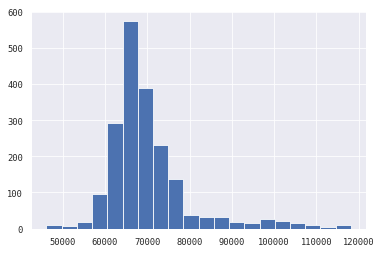

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


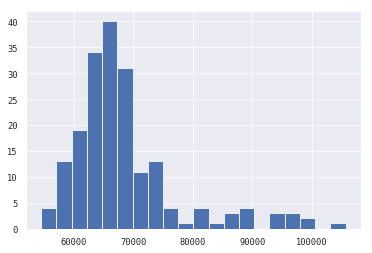

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


('Min', 54580)
('Max', 105663)


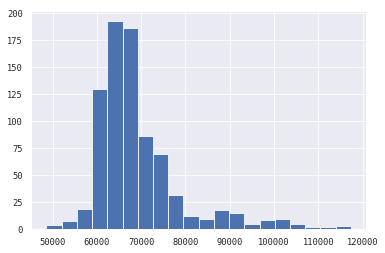

('Min', 48610)
('Max', 117349)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [391]:
conf_interval_hist('property_value', 0.005)

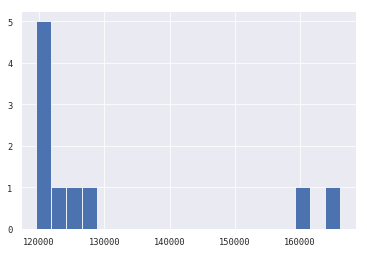

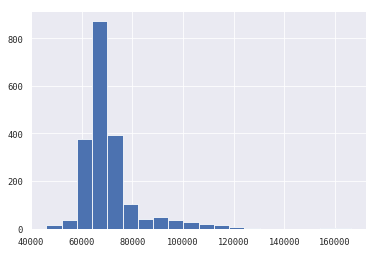

default_loan


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


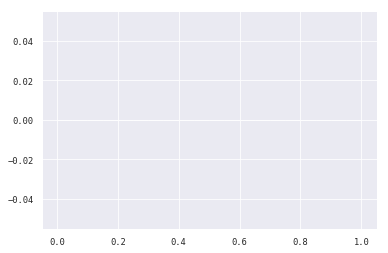

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


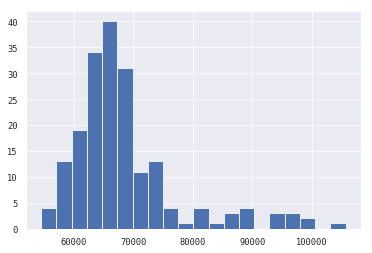

nondefault_loan


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


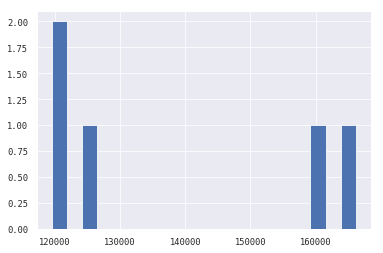

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


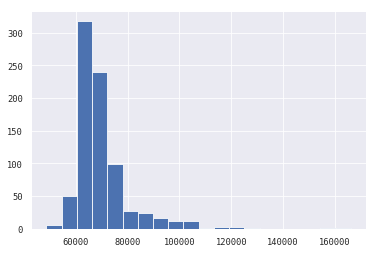

In [392]:
hist_for_outliers('property_value', 0.005)

#### disbursed_loan_amount

(73026.3, 29524.0)


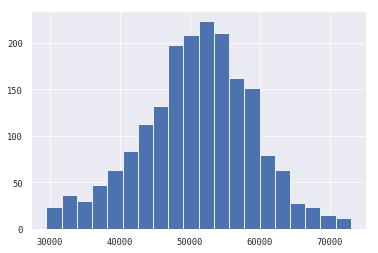

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


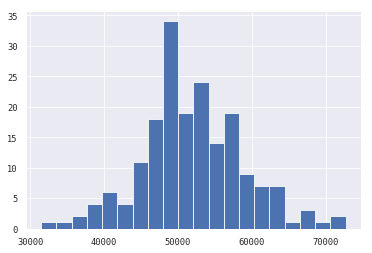

('Min', 31484)
('Max', 72717)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


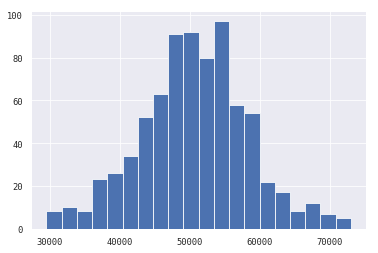

('Min', 29525)
('Max', 73023)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [393]:
conf_interval_hist('disbursed_loan_amount')

#### ltv

(89.78, 45.5655)


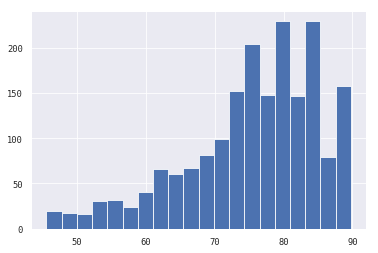

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


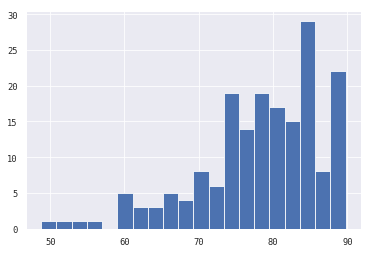

('Min', 48.79)
('Max', 89.76)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


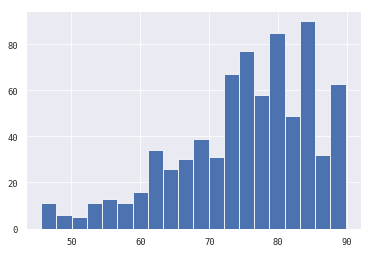

('Min', 45.64)
('Max', 89.77)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [394]:
conf_interval_hist('ltv')

#### Disbursed loan amount - ltv

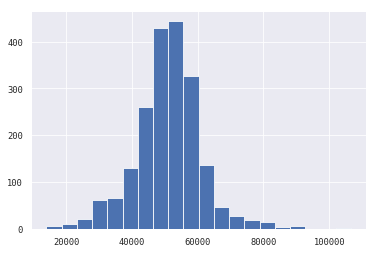

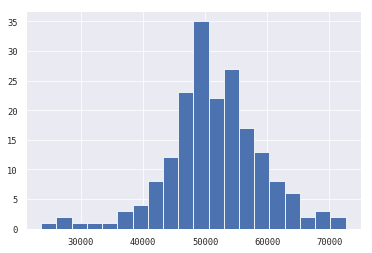

('Min', 23617.62)
('Max', 72640.43)


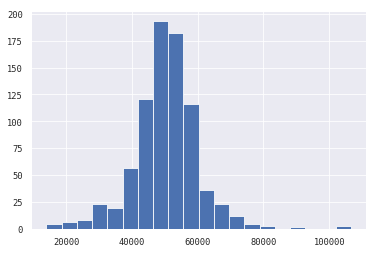

('Min', 13971.43)
('Max', 106578.05)


In [395]:
standart_hist('dis_amount-ltv')

#### Loan default

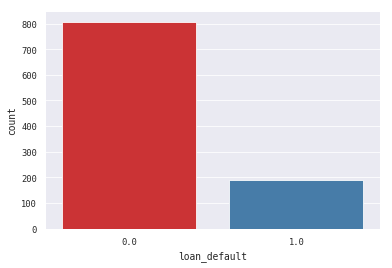

In [396]:
_ = sns.countplot(df['loan_default'].dropna(), palette='Set1')

#### average_account_age_month

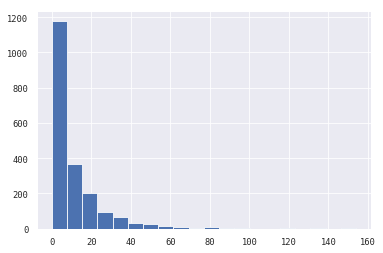

In [397]:
_ = df['average_acct_age_month'].hist(bins=20,label='month')

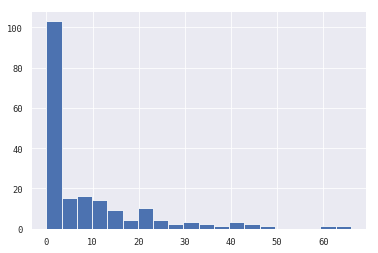

In [398]:
_ = df[default_mask]['average_acct_age_month'].hist(bins=20,label='month')

In [399]:
np.max(df[default_mask]['average_acct_age_month'])

66

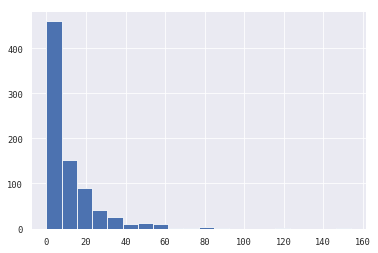

In [400]:
_ = df[non_default_mask]['average_acct_age_month'].hist(bins=20,label='month')

In [401]:
np.max(df[non_default_mask]['average_acct_age_month'])

154

#### Passport_flag

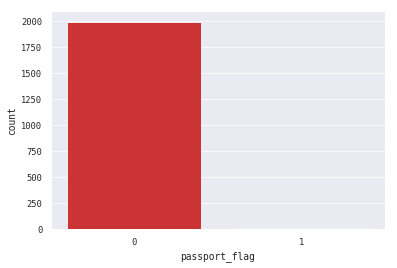

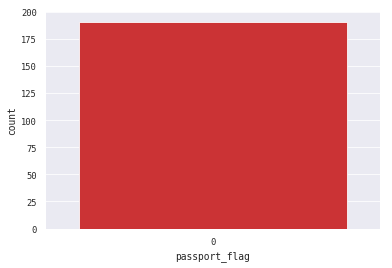

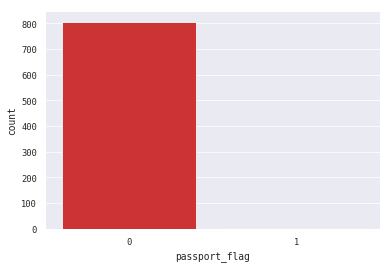

In [402]:
plot_boolean('passport_flag')

#### Aadhar_flag

In [403]:
def plot_boolean(name):
  _ = sns.countplot(df[name].dropna(), palette='Set1')
  plt.show()
  _ = sns.countplot(df[default_mask][name].dropna(), palette='Set1')
  plt.show()
  _ = sns.countplot(df[non_default_mask][name].dropna(), palette='Set1')
  plt.show()

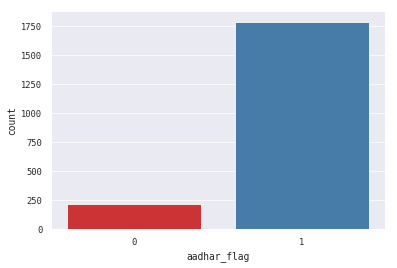

In [404]:
_ = sns.countplot(df['aadhar_flag'].dropna(), palette='Set1')

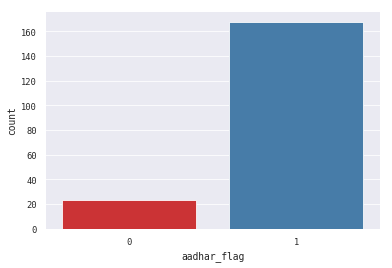

In [405]:
_ = sns.countplot(df[default_mask]['aadhar_flag'].dropna(), palette='Set1')

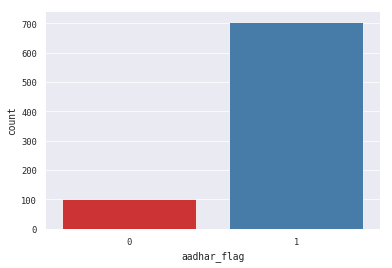

In [406]:
_ = sns.countplot(df[non_default_mask]['aadhar_flag'].dropna(), palette='Set1')

#### credit_history_length  

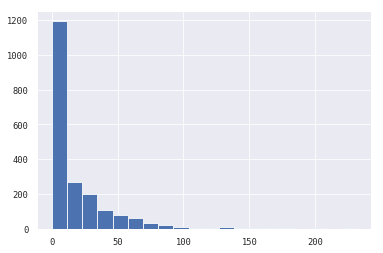

In [407]:
_ = df['credit_history_length_month'].hist(bins=20,label='month')

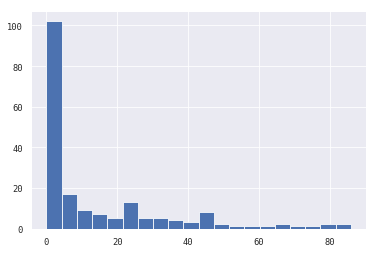

In [408]:
_ = df[default_mask]['credit_history_length_month'].hist(bins=20,label='month')

In [409]:
np.max(df[default_mask]['credit_history_length_month'])

86

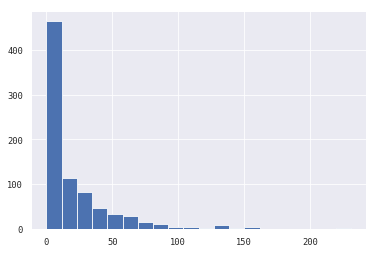

In [410]:
_ = df[non_default_mask]['credit_history_length_month'].hist(bins=20,label='month')

In [411]:
np.max(df[non_default_mask]['credit_history_length_month'])

231

#### current_pincode

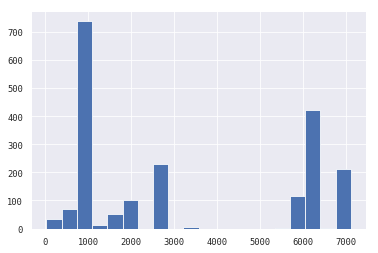

In [412]:
_ = df['current_pincode'].hist(bins=20,label='month')

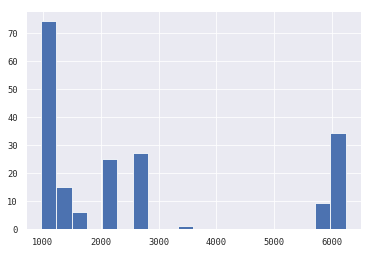

In [413]:
_ = df[default_mask]['current_pincode'].hist(bins=20,label='month')

In [414]:
np.max(df[default_mask]['current_pincode'])

6233

In [415]:
np.min(df[default_mask]['current_pincode'])

971

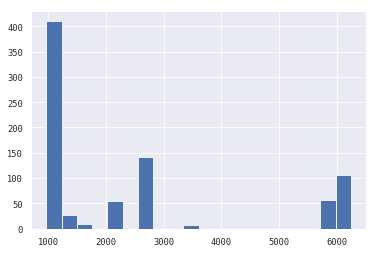

In [416]:
_ = df[non_default_mask]['current_pincode'].hist(bins=20,label='month')

In [417]:
np.max(df[non_default_mask]['current_pincode'])

6247

In [418]:
np.min(df[default_mask]['current_pincode'])

971

#### delinquent_accts_last_six_mths

In [419]:
np.unique(df['delinquent_accts_last_six_mths'])

array([0, 1, 2, 3, 4, 8])

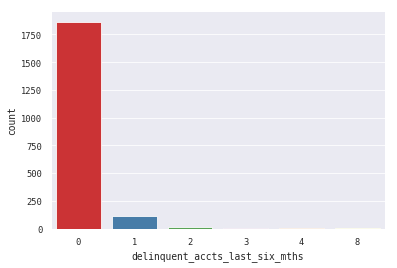

In [420]:
_ = sns.countplot(df['delinquent_accts_last_six_mths'], palette='Set1')

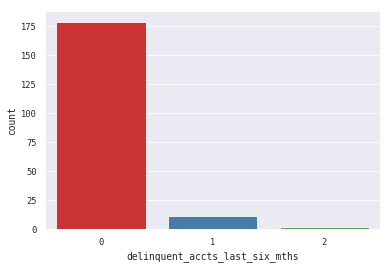

In [421]:
_ = sns.countplot(df[default_mask]['delinquent_accts_last_six_mths'], palette='Set1')

In [422]:
np.max(df[default_mask]['delinquent_accts_last_six_mths'])

2

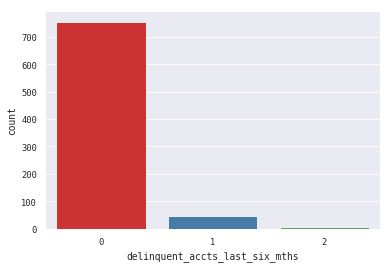

In [423]:
_ = sns.countplot(df[non_default_mask]['delinquent_accts_last_six_mths'], palette='Set1')

In [424]:
np.max(df[non_default_mask]['delinquent_accts_last_six_mths'])

2

#### age

In [425]:
np.unique(df['age'])

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

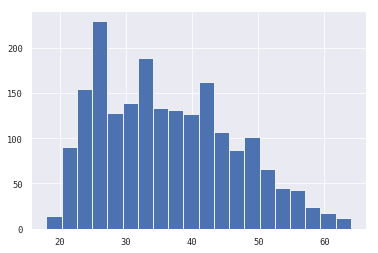

In [426]:
_ = df['age'].hist(bins=20,label='age')

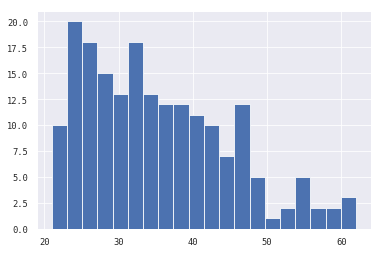

In [427]:
_ = df[default_mask]['age'].hist(bins=20,label='age')

In [428]:
np.max(df[default_mask]['age'])

62

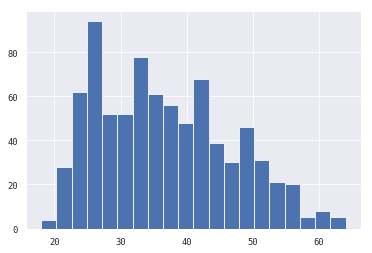

In [429]:
_ = df[non_default_mask]['age'].hist(bins=20,label='month')

In [430]:
np.max(df[non_default_mask]['age'])

64

#### DisbursalDate_year

In [431]:
np.unique(df['DisbursalDate_year'])

array([2018])

#### DisbursalDate_month

In [432]:
def standart_countplot(name):
  _ = sns.countplot(df[name], palette='Set1')
  plt.show()
  _ = sns.countplot(df[default_mask][name], palette='Set1')
  plt.show()
  _ = sns.countplot(df[non_default_mask][name], palette='Set1')
  plt.show()

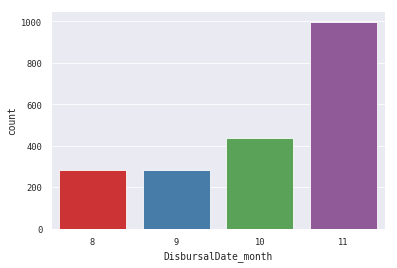

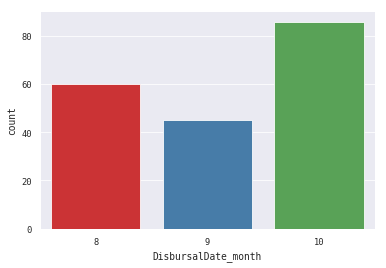

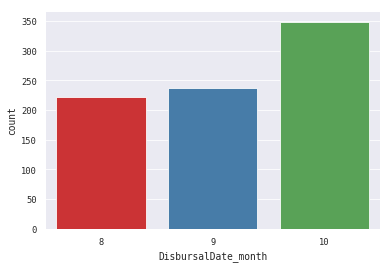

In [433]:
standart_countplot('DisbursalDate_month')

#### DisbursalDate_day

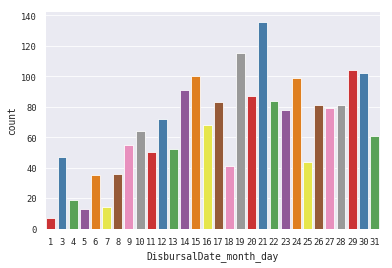

In [434]:
_ = sns.countplot(df['DisbursalDate_month_day'], palette='Set1')

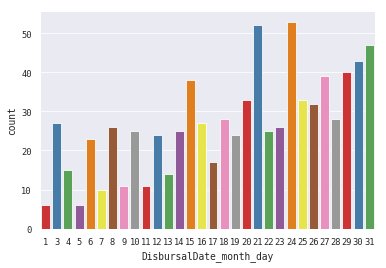

In [435]:
_ = sns.countplot(df[non_default_mask]['DisbursalDate_month_day'], palette='Set1')

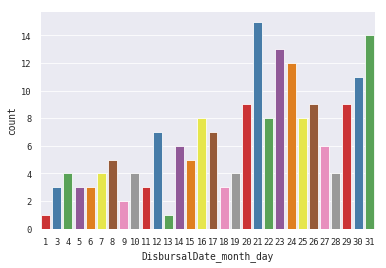

In [436]:
_ = sns.countplot(df[default_mask]['DisbursalDate_month_day'], palette='Set1')

#### DisbursalDate_month_day_of_week

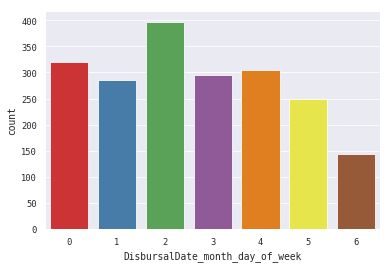

In [437]:
_ = sns.countplot(df['DisbursalDate_month_day_of_week'], palette='Set1')

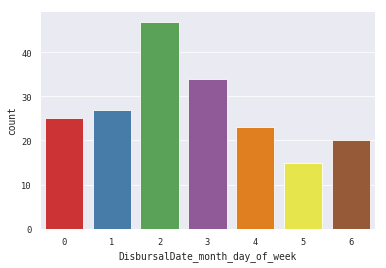

In [438]:
_ = sns.countplot(df[default_mask]['DisbursalDate_month_day_of_week'], palette='Set1')

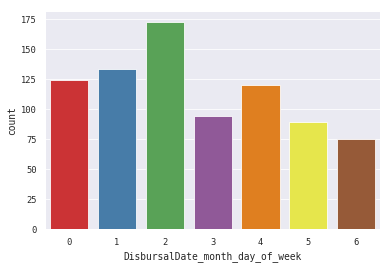

In [439]:
_ = sns.countplot(df[non_default_mask]['DisbursalDate_month_day_of_week'], palette='Set1')

#### employee_id

In [440]:
df['employee_id'].value_counts()

83      229
385     219
1570    181
1863    156
1835    117
1464    116
1646    102
864     102
958     102
624      79
1120     77
413      65
1998     56
703      52
998      50
282      46
1296     35
714      35
1348     31
785      30
1491     27
1796     27
1202     26
1468     21
1943      8
384       7
811       1
115       1
Name: employee_id, dtype: int64

In [441]:
df.head()

,customer_id,disbursed_loan_amount,property_value,ltv,current_pincode,date_of_birth,employment_type,disbursal_date,employee_id,mobile_flag,...,DisbursalDate,DisbursalDate_year,DisbursalDate_month,DisbursalDate_month_day,DisbursalDate_month_day_of_week,DisbursalDate_is_holiday,credit_score_transformed,credit_score_norm,dis_amount-ltv,Employment.Type
0,655269,53478,63558,86.54,1497,01-01-74,Salaried,03-11-18,1998,1,...,2018-11-03,2018,11,3,5,0,0,0.000000,53391.46,1.0
1,723482,55513,63163,89.45,1497,20-05-85,Self employed,20-11-18,1998,1,...,2018-11-20,2018,11,20,1,0,1,0.248555,55423.55,0.0
2,758529,65282,84320,79.93,2071,14-10-95,Salaried,29-11-18,1646,1,...,2018-11-29,2018,11,29,3,0,0,0.000000,65202.07,1.0
3,763449,46905,63896,76.58,2070,01-06-73,Self employed,29-11-18,1646,1,...,2018-11-29,2018,11,29,3,0,0,0.000000,46828.42,0.0
4,708663,51428,63896,86.08,2069,01-06-72,Salaried,17-11-18,1646,1,...,2018-11-17,2018,11,17,5,0,0,0.000000,51341.92,1.0


#### employee_id

In [442]:
np.unique(df['employee_id'])

array([  83,  115,  282,  384,  385,  413,  624,  703,  714,  785,  811,
        864,  958,  998, 1120, 1202, 1296, 1348, 1464, 1468, 1491, 1570,
       1646, 1796, 1835, 1863, 1943, 1998])

In [443]:
df['employee_id'].value_counts(dropna=False, normalize=True)

83      0.114615
385     0.109610
1570    0.090591
1863    0.078078
1835    0.058559
1464    0.058058
1646    0.051051
864     0.051051
958     0.051051
624     0.039540
1120    0.038539
413     0.032533
1998    0.028028
703     0.026026
998     0.025025
282     0.023023
1296    0.017518
714     0.017518
1348    0.015516
785     0.015015
1491    0.013514
1796    0.013514
1202    0.013013
1468    0.010511
1943    0.004004
384     0.003504
811     0.000501
115     0.000501
Name: employee_id, dtype: float64

#### employment_type

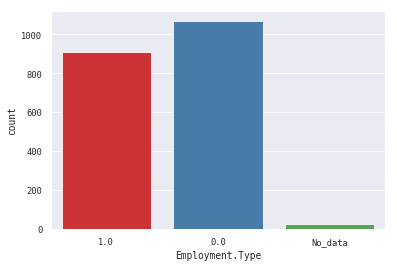

In [444]:
_ = sns.countplot(df['Employment.Type'].fillna("No_data"), palette='Set1')

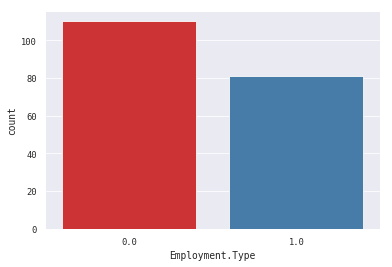

In [445]:
_ = sns.countplot(df[default_mask]['Employment.Type'].fillna("No_data"), palette='Set1')

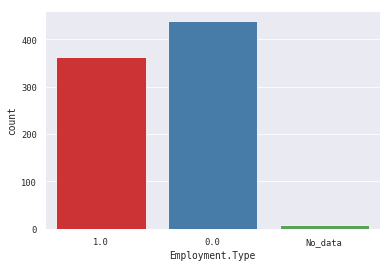

In [446]:
_ = sns.countplot(df[non_default_mask]['Employment.Type'].fillna("No_data"), palette='Set1')

non_default_mask self employed is greater

#### mobile_flag

In [447]:
df['mobile_flag'].value_counts()

1    1998
Name: mobile_flag, dtype: int64

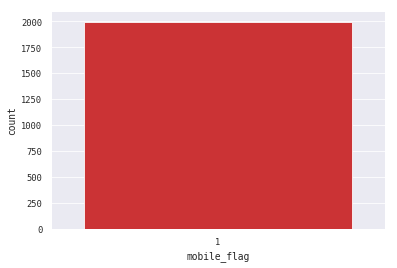

In [448]:
_ = sns.countplot(df['mobile_flag'], palette='Set1')

#### new_accts_last_six_mths  

New loans taken by the customer in last 6 months before the disbursement

In [449]:
df['new_accts_last_six_mths'].value_counts()

0     1565
1      292
2       82
3       31
4       16
5        5
6        3
9        2
14       1
11       1
Name: new_accts_last_six_mths, dtype: int64

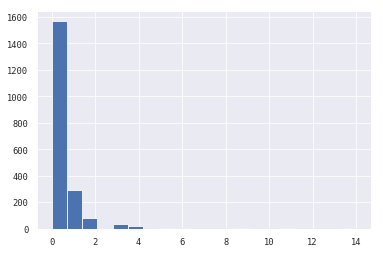

In [450]:
_ = df['new_accts_last_six_mths'].hist(bins=20,label='month')

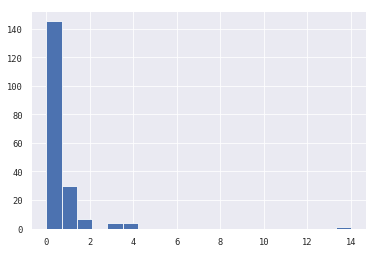

In [451]:
_ = df[default_mask]['new_accts_last_six_mths'].hist(bins=20,label='month')

In [452]:
np.max(df[default_mask]['new_accts_last_six_mths'])

14

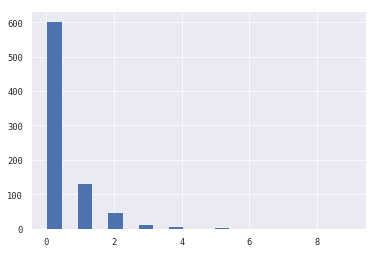

In [453]:
_ = df[non_default_mask]['new_accts_last_six_mths'].hist(bins=20,label='month')

In [454]:
np.max(df[non_default_mask]['new_accts_last_six_mths'])

9

#### credit_inquiries

In [455]:
df['credit_inquiries'].value_counts()

0     1698
1      221
2       41
3       17
4       10
5        6
6        3
12       1
9        1
Name: credit_inquiries, dtype: int64

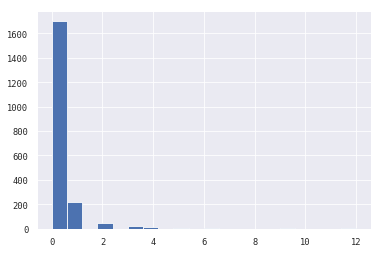

In [456]:
_ = df['credit_inquiries'].hist(bins=20,label='number')

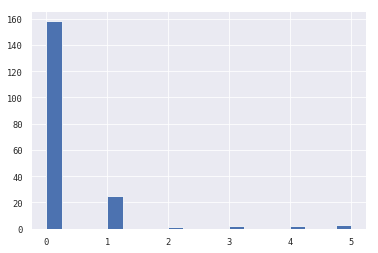

In [457]:
_ = df[default_mask]['credit_inquiries'].hist(bins=20,label='number')

In [458]:
np.max(df[default_mask]['credit_inquiries'])

5

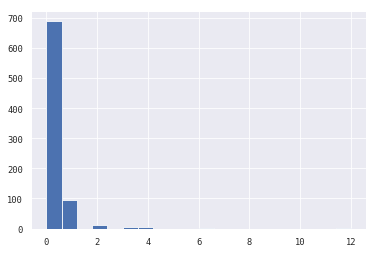

In [459]:
_ = df[non_default_mask]['credit_inquiries'].hist(bins=20,label='number')

In [460]:
np.max(df[non_default_mask]['credit_inquiries'])

12

#### PAN_flag

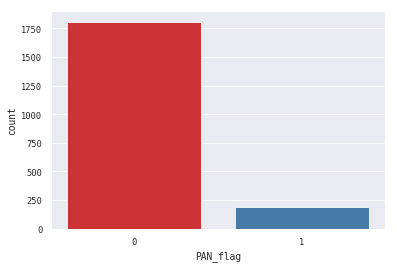

In [461]:
_ = sns.countplot(df['PAN_flag'], palette='Set1')

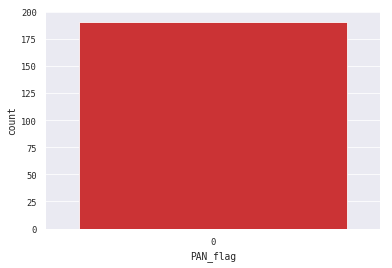

In [462]:
_ = sns.countplot(df[default_mask]['PAN_flag'], palette='Set1')

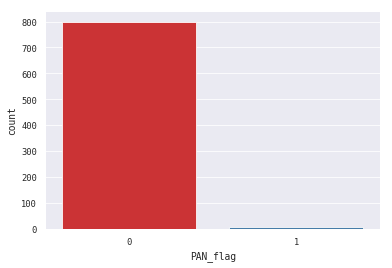

In [463]:
_ = sns.countplot(df[non_default_mask]['PAN_flag'], palette='Set1')

#### Credit_score

Bureau Score

In [464]:
df['credit_score'].value_counts()

0      894
825    129
738     84
300     61
763     32
708     28
17      26
15      21
16      21
749     19
836     18
18      15
710     14
681     13
830     11
783     11
615     10
753      9
627      9
657      8
717      8
792      8
832      8
758      8
737      8
774      8
623      7
719      7
709      7
762      7
      ... 
767      1
611      1
520      1
523      1
527      1
532      1
537      1
540      1
543      1
558      1
564      1
565      1
567      1
568      1
809      1
574      1
581      1
582      1
801      1
697      1
800      1
590      1
592      1
595      1
784      1
777      1
604      1
770      1
609      1
879      1
Name: credit_score, Length: 263, dtype: int64

In [465]:
mask = df['credit_score'] > 0

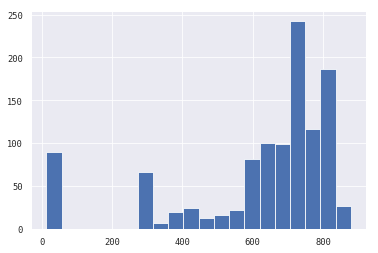

In [466]:
_ = df[mask]['credit_score'].hist(bins=20,label='number')

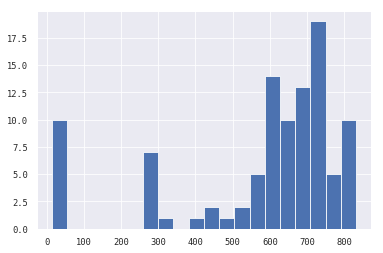

In [467]:
_ = df[default_mask&mask]['credit_score'].hist(bins=20,label='number')

In [468]:
np.max(df[default_mask&mask]['credit_score'])

832

In [469]:
np.min(df[default_mask&mask]['credit_score'])

14

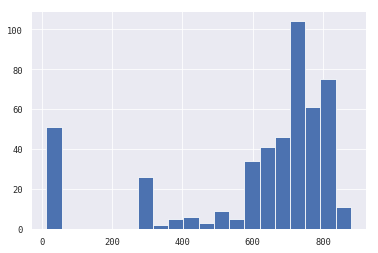

In [470]:
_ = df[non_default_mask&mask]['credit_score'].hist(bins=20,label='score')

In [471]:
np.max(df[non_default_mask&mask]['credit_score'])

879

In [472]:
np.min(df[default_mask&mask]['credit_score'])

14

#### credit_score_desc

Bureau score description

In [473]:
df['credit_score_desc'].value_counts()

No Bureau History Available                                894
A-Very Low Risk                                            196
C-Very Low Risk                                            152
D-Very Low Risk                                            115
B-Very Low Risk                                            107
H-Medium Risk                                               74
K-High Risk                                                 69
F-Low Risk                                                  66
E-Low Risk                                                  66
M-Very High Risk                                            61
I-Medium Risk                                               52
G-Low Risk                                                  31
Not Scored: Not Enough Info available on the customer       26
Not Scored: No Activity seen on the customer (Inactive)     21
Not Scored: Sufficient History Not Available                21
J-High Risk                                            

In [474]:
def plot_stat_CNS(rating):
  print(rating)
  _ = df[df['credit_score_desc'] == rating]['credit_score'].hist(bins=20,label='number')
  plt.show()
  print("Range", np.min(df[df['credit_score_desc'] == rating]['credit_score']), np.max(df[df['credit_score_desc'] == rating]['credit_score']))

No Bureau History Available


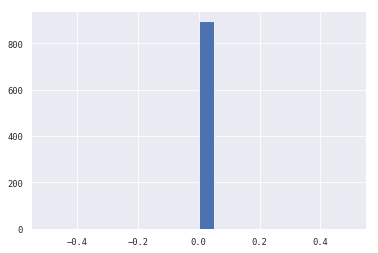

('Range', 0, 0)
C-Very Low Risk


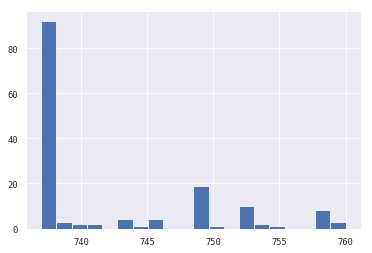

('Range', 737, 760)
Not Scored: Only a Guarantor


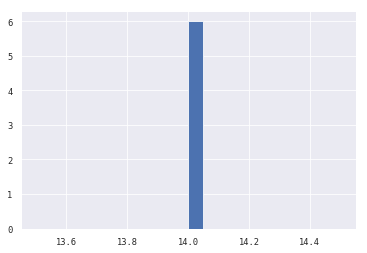

('Range', 14, 14)
K-High Risk


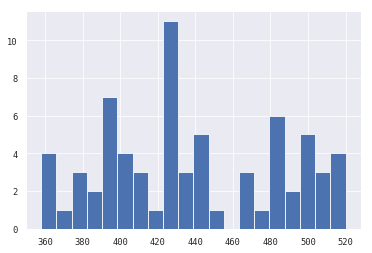

('Range', 358, 520)
B-Very Low Risk


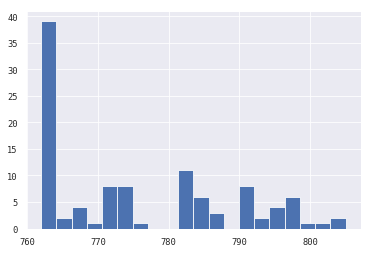

('Range', 762, 805)
I-Medium Risk


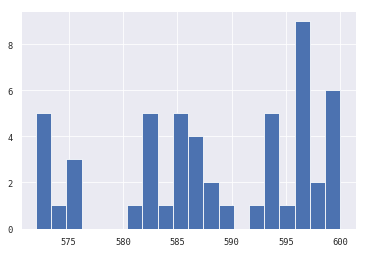

('Range', 572, 600)
D-Very Low Risk


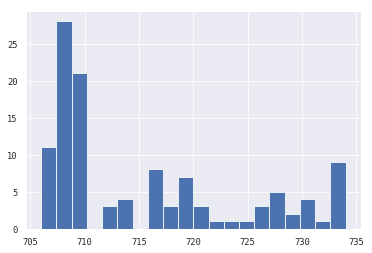

('Range', 706, 734)
A-Very Low Risk


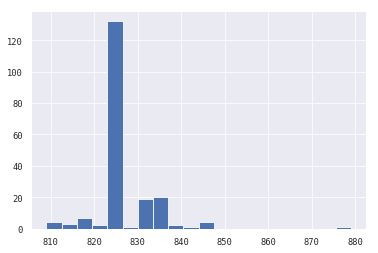

('Range', 809, 879)
M-Very High Risk


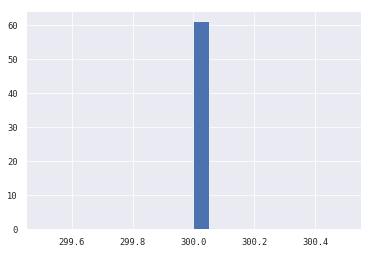

('Range', 300, 300)
E-Low Risk


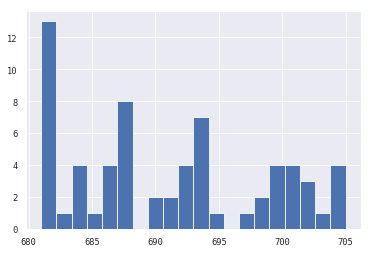

('Range', 681, 705)
F-Low Risk


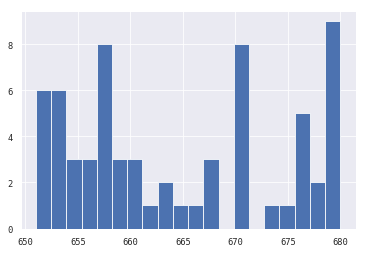

('Range', 651, 680)
G-Low Risk


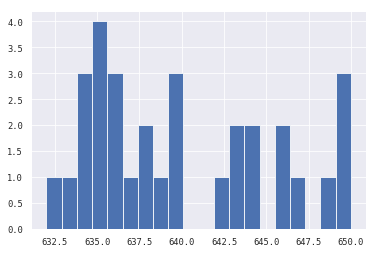

('Range', 632, 650)
Not Scored: No Activity seen on the customer (Inactive)


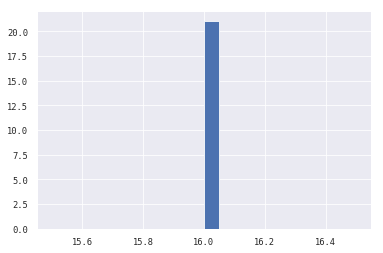

('Range', 16, 16)
H-Medium Risk


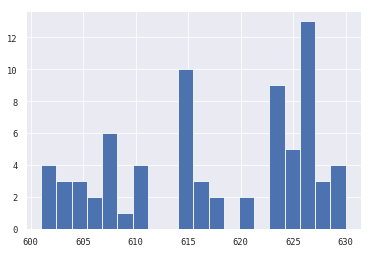

('Range', 601, 630)
J-High Risk


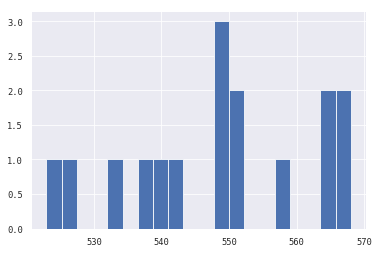

('Range', 523, 568)
L-Very High Risk


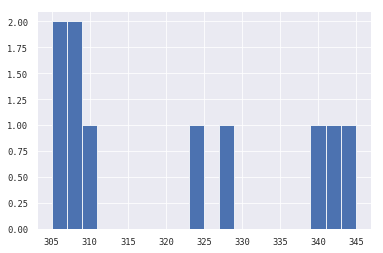

('Range', 305, 345)
Not Scored: Sufficient History Not Available


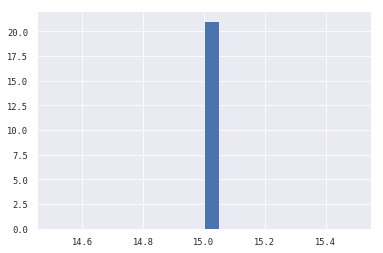

('Range', 15, 15)
Not Scored: Not Enough Info available on the customer


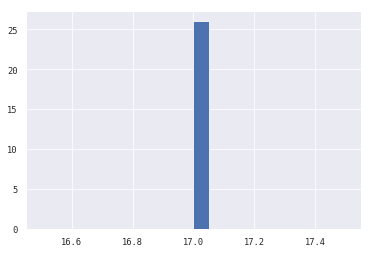

('Range', 17, 17)
Not Scored: No Updates available in last 36 months


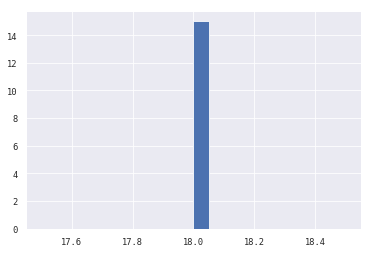

('Range', 18, 18)


In [475]:
for rating in df['credit_score_desc'].unique():
  plot_stat_CNS(rating)

#### active_no_accts

count of active loans taken by the customer at the time of disbursement

In [476]:
df['active_no_accts'].value_counts()

0     1145
1      388
2      191
3      128
4       62
5       30
6       20
8       11
7       10
9        6
11       3
10       2
15       1
14       1
Name: active_no_accts, dtype: int64

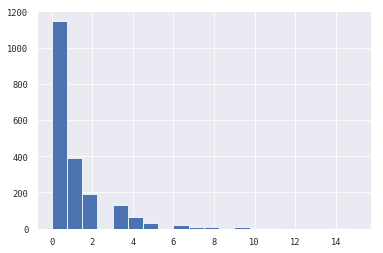

In [477]:
_ = df['active_no_accts'].hist(bins=20,label='accts')

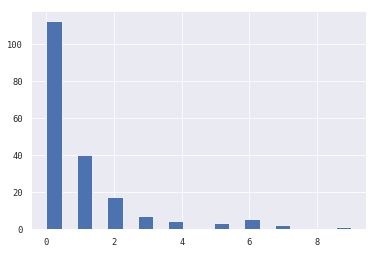

In [478]:
_ = df[default_mask]['active_no_accts'].hist(bins=20,label='accts')

In [479]:
np.max(df[default_mask]['active_no_accts'])

9

In [480]:
np.min(df[default_mask]['active_no_accts'])

0

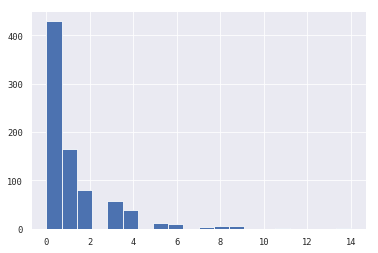

In [481]:
_ = df[non_default_mask]['active_no_accts'].hist(bins=20,label='accts')

In [482]:
np.max(df[non_default_mask]['active_no_accts'])

14

In [483]:
np.min(df[default_mask]['active_no_accts'])

0

#### sec_active_no_accts

count of active loans taken by the customer at the time of disbursement

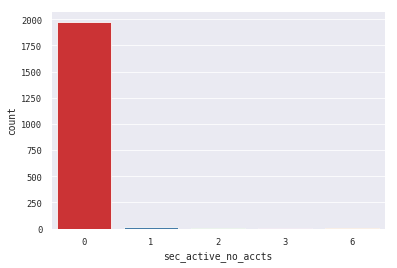

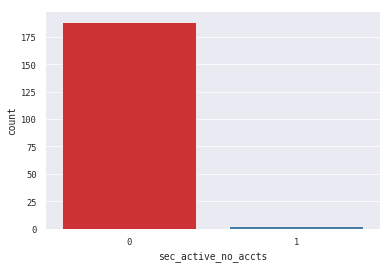

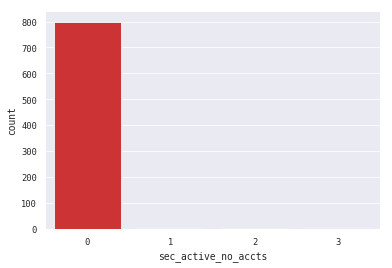

In [484]:
standart_countplot('sec_active_no_accts')

#### active_curr_balance

total Principal outstanding amount of the active loans at the time of disbursement

(1339247.8500000003, 0.0)


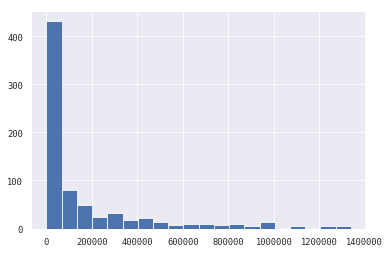

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


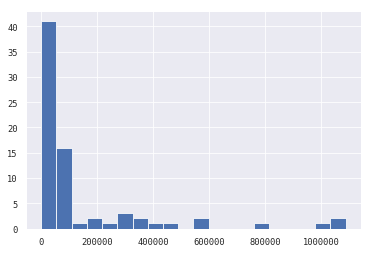

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


('Min', 800)
('Max', 1086661)


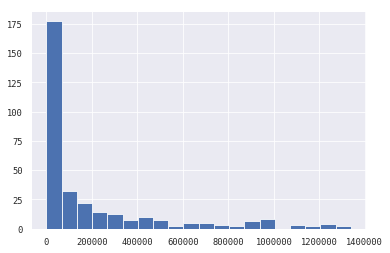

('Min', 5)
('Max', 1338774)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [485]:
conf_interval_hist('active_curr_balance')

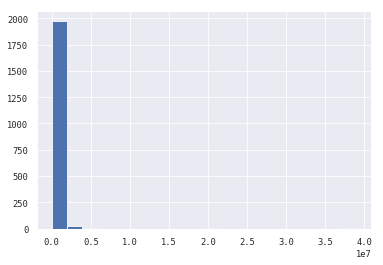

In [486]:
_ = df['active_curr_balance'].hist(bins=20,label='balance')

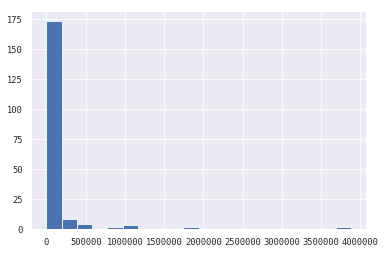

In [487]:
_ = df[default_mask]['active_curr_balance'].hist(bins=20,label='balance')

In [488]:
np.max(df[default_mask]['active_curr_balance'])

3878357

In [489]:
np.min(df[default_mask]['active_curr_balance'])

0

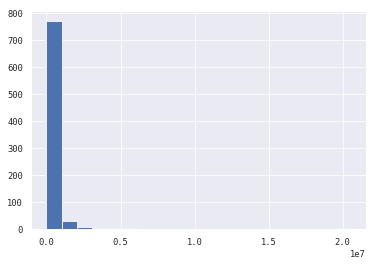

In [490]:
_ = df[non_default_mask]['active_curr_balance'].hist(bins=20,label='accts')

In [491]:
np.max(df[non_default_mask]['active_curr_balance'])

20551712

In [492]:
np.min(df[non_default_mask]['active_curr_balance'])

-737

#### sec_active_curr_balance

total Principal outstanding amount of the active loans at the time of disbursement

(10735.390000001944, 0.0)


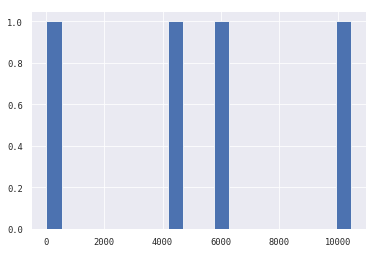

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


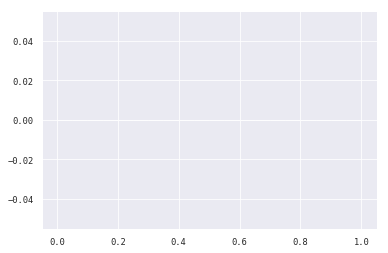

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


('Min', nan)
('Max', nan)


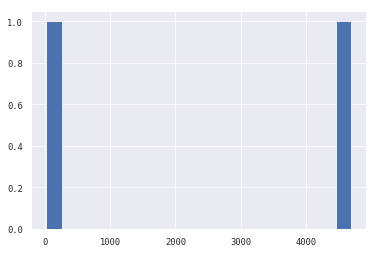

('Min', 28)
('Max', 4683)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [493]:
conf_interval_hist("sec_active_curr_balance", 0.005)

#### total_disbursed_amt 

total amount that was disbursed for all the loans at the time of disbursement

(1621930.550000002, 0.0)


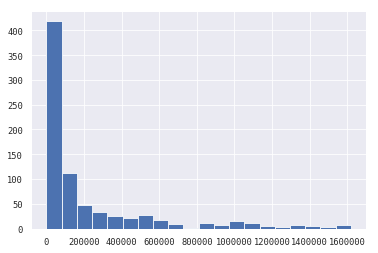

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


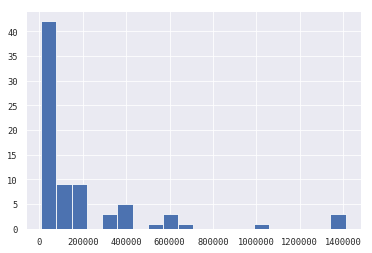

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


('Min', 7951)
('Max', 1411625)


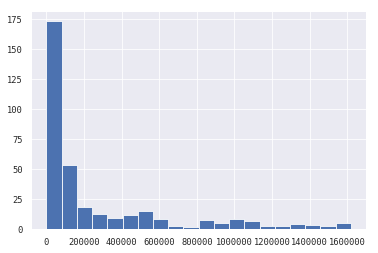

('Min', 248)
('Max', 1619000)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [494]:
conf_interval_hist('total_disbursed_amt')

#### sec_total_disbursed_amt

total amount that was disbursed for all the loans at the time of disbursement

(78391.63000000422, 0.0)


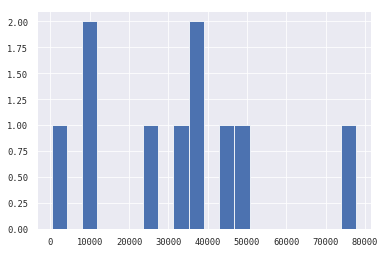

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


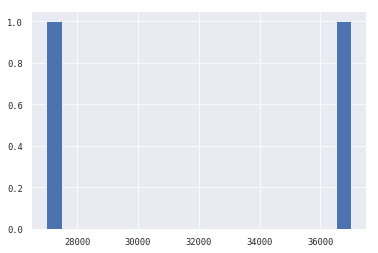

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


('Min', 26990)
('Max', 37000)


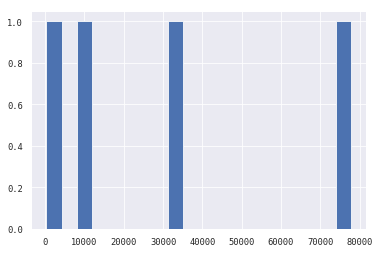

('Min', 361)
('Max', 77758)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [495]:
conf_interval_hist('sec_total_disbursed_amt', 0.005)

#### total_no_accts

count of total loans taken by the customer at the time of disbursement

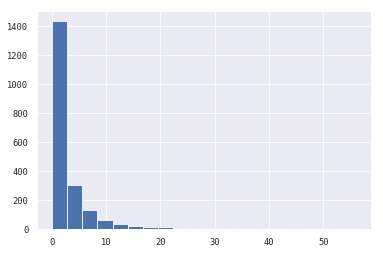

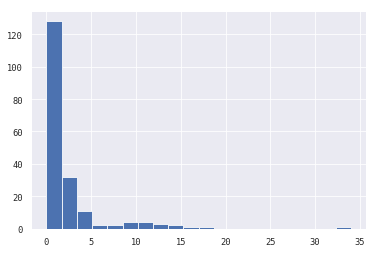

('Min', 0)
('Max', 34)


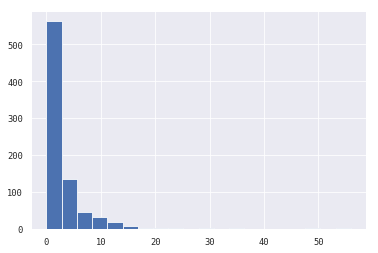

('Min', 0)
('Max', 56)


In [496]:
standart_hist('total_no_accts')

#### sec_total_no_accts

count of total loans taken by the customer at the time of disbursement

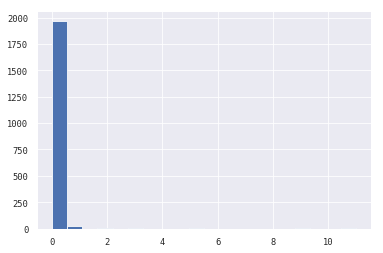

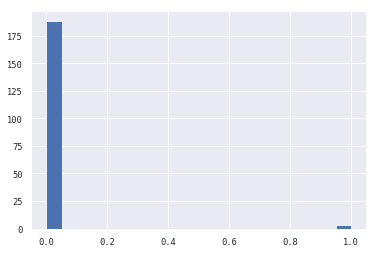

('Min', 0)
('Max', 1)


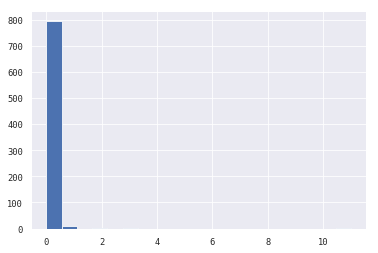

('Min', 0)
('Max', 11)


In [497]:
standart_hist('sec_total_no_accts')

#### total_default_accts
count of default accounts at the time of disbursement

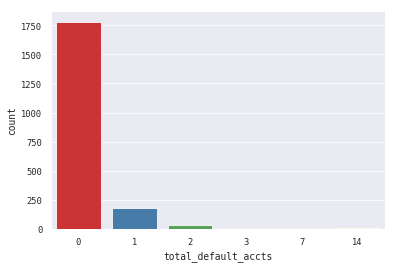

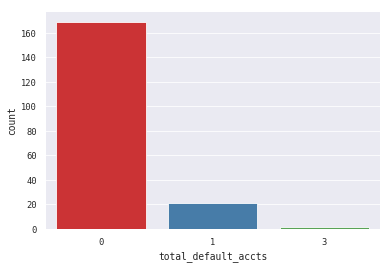

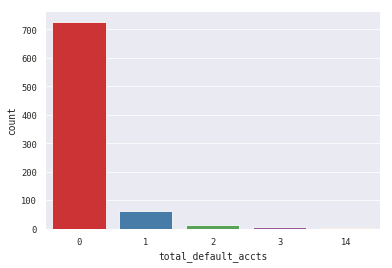

In [498]:
standart_countplot('total_default_accts')

#### sec_total_default_accts

count of default accounts at the time of disbursement

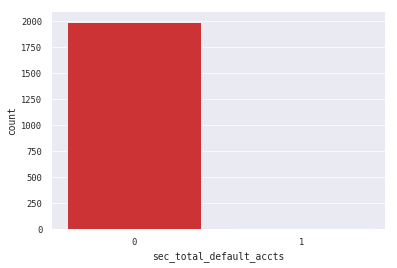

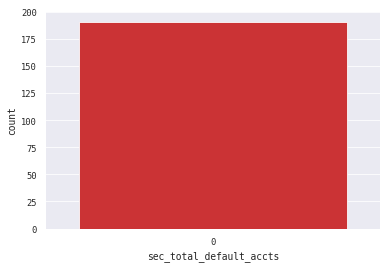

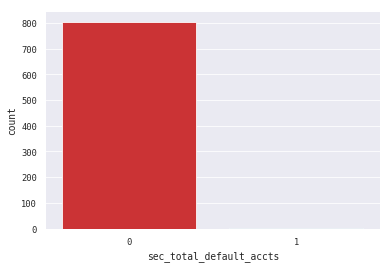

In [499]:
standart_countplot('sec_total_default_accts')

#### total_sanctioned_amt
total amount that was sanctioned for all the loans at the time of disbursement

In [500]:
df['total_sanctioned_amt'].quantile(0.975)

1613043.0000000002

(1613043.0000000002, 0.0)


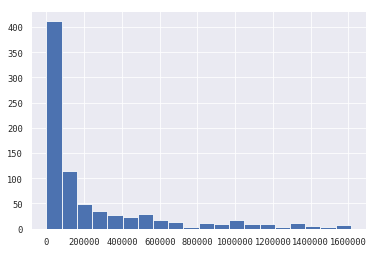

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


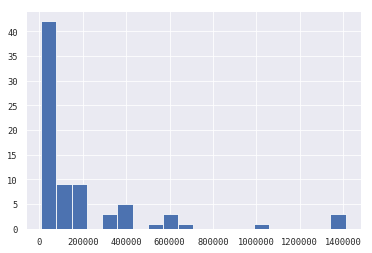

('Min', 7951)
('Max', 1411625)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


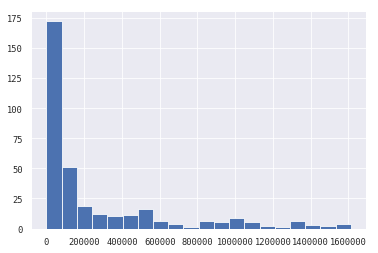

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


('Min', 248)
('Max', 1612560)


In [501]:
conf_interval_hist('total_sanctioned_amt')

#### sec_total_sanctioned_amt

total amount that was sanctioned for all the loans at the time of disbursement

(69410.40000000513, 0.0)


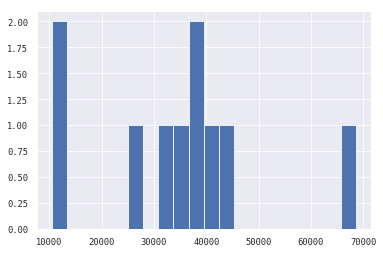

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


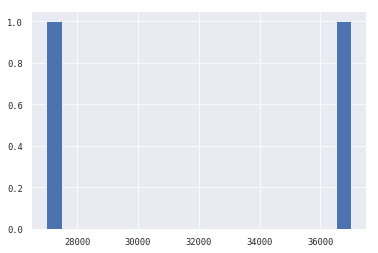

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


('Min', 26990)
('Max', 37000)


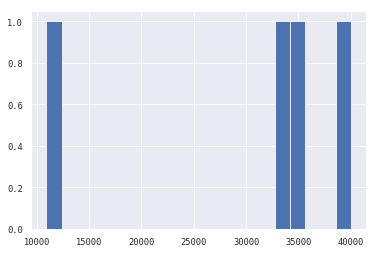

('Min', 10935)
('Max', 40000)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [502]:
conf_interval_hist('sec_total_sanctioned_amt', 0.005)

#### monthly_installment

EMI Amount of the primary loan

(45081.35000000002, 0.0)


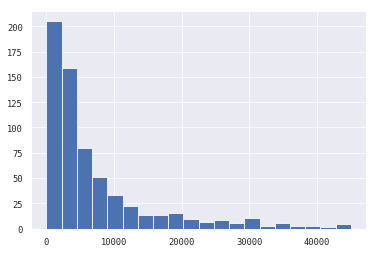

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


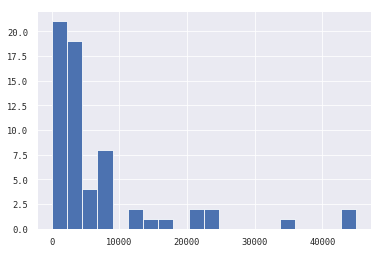

('Min', 31)
('Max', 45000)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


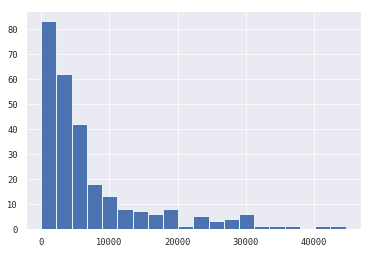

('Min', 29)
('Max', 44629)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [503]:
conf_interval_hist('monthly_installment')

#### sec_monthly_installment 

(1333.4950000000233, 0.0)


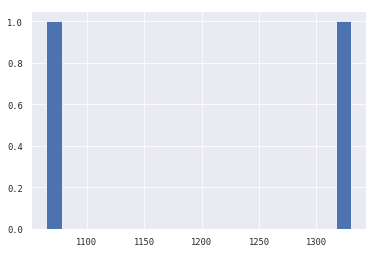

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


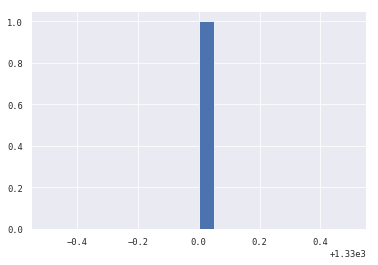

/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


('Min', 1330)
('Max', 1330)


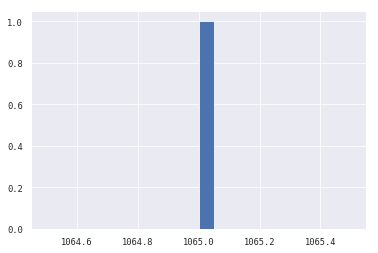

('Min', 1065)
('Max', 1065)


/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/developer/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [504]:
conf_interval_hist('sec_monthly_installment', 0.005)

### Drop features

In [507]:
df_ = df.copy()

In [508]:
features_to_drop = ['credit_history_length', 'average_loan_tenure', 'date_of_birth', 'DisbursalDate_year','DisbursalDate', 'mobile_flag', 'credit_score_desc', 'credit_score','disbursed_loan_amount']

In [509]:
df_.drop(features_to_drop, axis=1, inplace=True)

In [510]:
df_.dtypes

customer_id                          int64
property_value                       int64
ltv                                float64
current_pincode                      int64
employment_type                     object
disbursal_date                      object
employee_id                          int64
aadhar_flag                          int64
PAN_flag                             int64
passport_flag                        int64
total_no_accts                       int64
active_no_accts                      int64
total_default_accts                  int64
active_curr_balance                  int64
total_sanctioned_amt                 int64
total_disbursed_amt                  int64
sec_total_no_accts                   int64
sec_active_no_accts                  int64
sec_total_default_accts              int64
sec_active_curr_balance              int64
sec_total_sanctioned_amt             int64
sec_total_disbursed_amt              int64
monthly_installment                  int64
sec_monthly

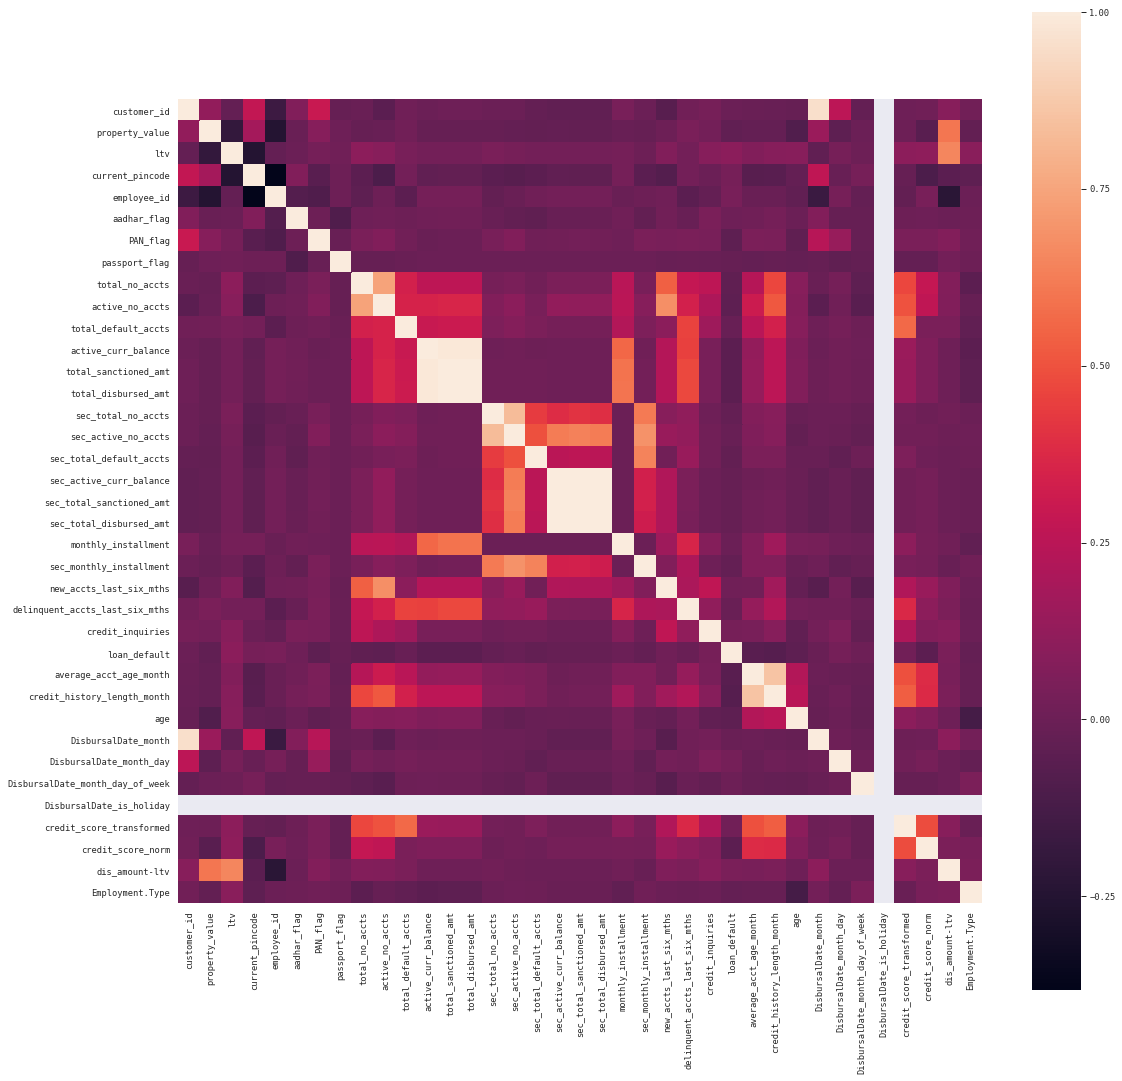

In [511]:
sns.set(context="paper", font="monospace")

corrmat = df_.corr()
fig, ax = plt.subplots(figsize=(18,18))  
_ = sns.heatmap(corrmat, square=True,  ax=ax)